In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.feature_extraction.text import CountVectorizer
from textblob import TextBlob


In [3]:
dataset_MH = pd.read_csv("abcnews-date-text.csv")
#dataset_MH.head(10)

dataset_date = dataset_MH["publish_date"]
dataset_headline = dataset_MH["headline_text"]

print(dataset_date.head())
print(dataset_headline.head())

0    20030219
1    20030219
2    20030219
3    20030219
4    20030219
Name: publish_date, dtype: int64
0    aba decides against community broadcasting lic...
1       act fire witnesses must be aware of defamation
2       a g calls for infrastructure protection summit
3             air nz staff in aust strike for pay rise
4        air nz strike to affect australian travellers
Name: headline_text, dtype: object


In [4]:
# Define helper functions 
def get_top_n_words(n_top_words, count_vectorizer, text_data):
    '''
    returns a tuple of the top n words in a sample and their 
    accompanying counts, given a CountVectorizer object and text sample
    '''
    vectorized_headlines = count_vectorizer.fit_transform(text_data.values)
    vectorized_total = np.sum(vectorized_headlines, axis=0)
    word_indices = np.flip(np.argsort(vectorized_total)[0,:], 1)
    word_values = np.flip(np.sort(vectorized_total)[0,:],1)
    
    word_vectors = np.zeros((n_top_words, vectorized_headlines.shape[1]))
    for i in range(n_top_words):
        word_vectors[i,word_indices[0,i]] = 1

    words = [word[0].encode('ascii').decode('utf-8') for 
             word in count_vectorizer.inverse_transform(word_vectors)]

    return (words, word_values[0,:n_top_words].tolist()[0])

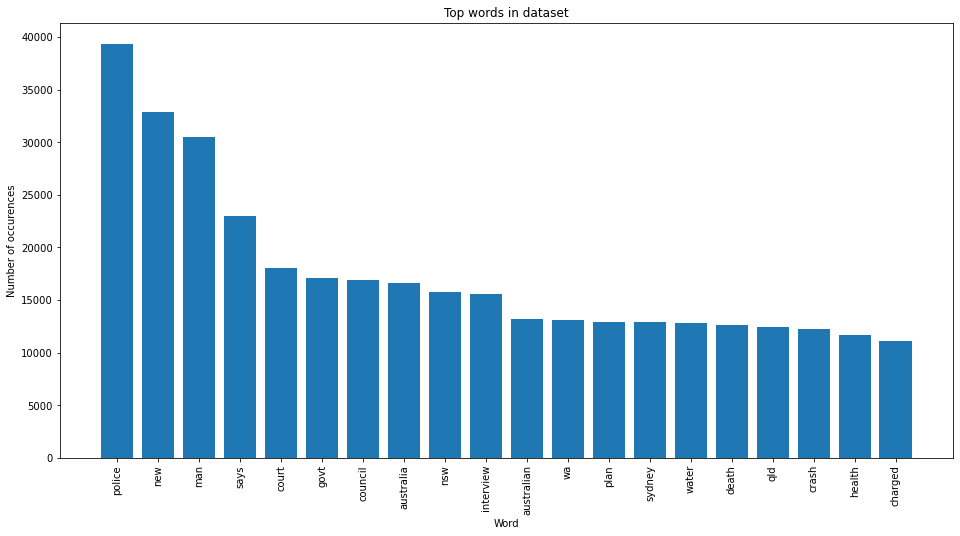

In [5]:
count_vectorizer = CountVectorizer(stop_words='english')
words, word_values = get_top_n_words(n_top_words=20,
                                     count_vectorizer=count_vectorizer, 
                                     text_data=dataset_headline)

fig, ax = plt.subplots(figsize=(16,8))
ax.bar(range(len(words)), word_values)
ax.set_xticks(range(len(words)))
ax.set_xticklabels(words, rotation='vertical')
ax.set_title('Top words in dataset')
ax.set_xlabel('Word')
ax.set_ylabel('Number of occurences')
plt.show()

In [43]:
import markovify
import random

In [ ]:
dataset_headline[random.sample(range(100),20)]

In [8]:
from sklearn.feature_extraction.text import TfidfTransformer

vectorized_headlines = count_vectorizer.fit_transform(dataset_headline.values)
tfidf_transformer=TfidfTransformer(smooth_idf=True,use_idf=True) 
tfidf_transformer.fit(vectorized_headlines)

# print idf values 
df_idf = pd.DataFrame(tfidf_transformer.idf_, index=count_vectorizer.get_feature_names(),columns=["idf_weights"]) 
# sort ascending 
df_idf.sort_values(by=['idf_weights'])



,idf_weights
police,4.440677
new,4.624562
man,4.696557
says,4.975881
court,5.221629
...,...
karnali,14.326331
karolyis,14.326331
karpal,14.326331
karpasitis,14.326331


In [60]:
from sklearn.feature_extraction.text import TfidfVectorizer
# Define helper functions for tfidf
def get_top_n_tfidf(n_top_words, count_vectorizer, text_data):
    '''
    returns a tuple of the top n words of tfidf in a sample and their 
    accompanying counts, given a CountVectorizer object and text sample
    '''
    #use tfidf vectorizer
    tfidf_vectorizer=TfidfVectorizer(use_idf=True)
    
    fitted_vectorizer=tfidf_vectorizer.fit(text_data.values)
    tfidf_vectorizer_vectors=fitted_vectorizer.transform(dataset_headline.values)

    # sorted words_values
    tifdf_sum = np.asarray(tfidf_vectorizer_vectors.sum(axis=0)).ravel()
    sorted_index = np.argsort(tifdf_sum)[::-1]
    tfidf_feature_names = np.array(tfidf_vectorizer.get_feature_names())
    words = tfidf_feature_names[sorted_index[:n_top_words]]
    word_values = tifdf_sum[sorted_index[:n_top_words]]

    return (words, word_values)

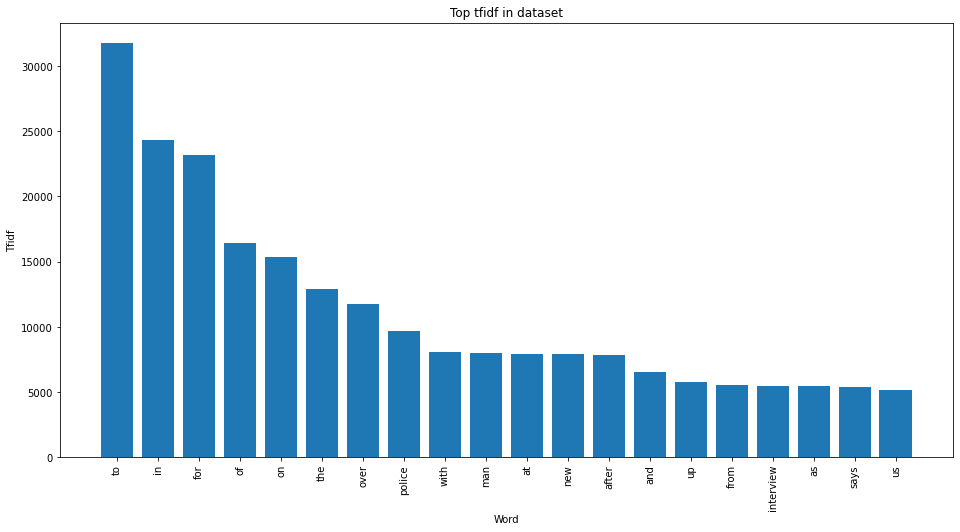

In [61]:
words_tfidf, word_values_tfidf = get_top_n_tfidf(n_top_words=20,
                                     count_vectorizer=count_vectorizer, 
                                     text_data=dataset_headline)

fig, ax = plt.subplots(figsize=(16,8))
ax.bar(range(len(words_tfidf)), word_values_tfidf)
ax.set_xticks(range(len(words_tfidf)))
ax.set_xticklabels(words_tfidf, rotation='vertical')
ax.set_title('Top tfidf in dataset')
ax.set_xlabel('Word')
ax.set_ylabel('Tfidf')
plt.show()

In [73]:
from sklearn.feature_extraction.text import TfidfVectorizer 
# use the Tfidfvectorizer
tfidf_vectorizer=TfidfVectorizer(use_idf=True) 
tfidf_vectorizer_vectors=tfidf_vectorizer.fit_transform(dataset_headline.values)

word_features =tfidf_vectorizer.get_feature_names()
print(len(word_features))
print(word_features[:50])



104691
['00', '000', '002', '005', '006', '007', '01', '0101', '0103', '0105', '0106', '010615', '0107', '010715', '0108', '010814', '0109', '0110', '0111', '011114', '0112', '011214', '013', '0130', '014', '0156', '0161', '0179', '018', '01pc', '02', '0201', '0202', '020215', '0204', '0205', '0206', '020615', '0207', '020715', '0208', '0209', '0210', '021014', '0211', '0212', '021214', '0214', '0216', '0241']


In [110]:
import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords
# set stopwords list
stops = set(stopwords.words('english'))

# union stopwords with punctuation
punc = ['.', ',', '"', "'", '?', '!', ':', ';', '(', ')', '[', ']', '{', '}',"%"]
stop_words = stops.union(punc)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\wongm\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [111]:
import nltk
from nltk.tokenize import RegexpTokenizer
# stem and tokenize
stemmer = nltk.stem.PorterStemmer()
tokenizer = RegexpTokenizer(r'[a-zA-Z\']+')


def tokenize(text):
    return [stemmer.stem(word) for word in tokenizer.tokenize(text.lower())]

In [112]:
tfidf_vectorizer=TfidfVectorizer(stop_words = stop_words ,tokenizer = tokenize) 
tfidf_vectorizer_vectors=tfidf_vectorizer.fit_transform(dataset_headline.values)

word_features =tfidf_vectorizer.get_feature_names()
#print the number of word_feature after setting up stopwords, stemming and tokenizing
print(len(word_features))
print(word_features[:50])

C:\Users\wongm\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:388: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'ani', 'becaus', 'befor', 'doe', 'dure', 'ha', 'hi', "it'", 'onc', 'onli', 'ourselv', "she'", "should'v", 'themselv', 'thi', 'veri', 'wa', 'whi', "you'r", "you'v", 'yourselv'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '


77058
["'a", "'a'", "'abandoned'", "'abbott", "'abducted'", "'abnormality'", "'abolitionists'", "'abomindable'", "'absolut", "'absurd'", "'abus", "'accelerated'", "'accept'", "'accident", "'accidentally'", "'actual", "'admit'", "'advanced'", "'afraid", "'afraid'", "'aggrav", "'aggression'", "'aggressive'", "'agitated'", "'agriculture'", "'ahead", "'air", "'aladdin", "'alarm", "'alarmed'", "'alarming'", "'alive'", "'all", "'allah'", "'allegiance'", "'almost", "'amarda'", "'amazing'", "'ambiti", "'ambul", "'an", "'angel", "'angri", "'angry'", "'anoth", "'anti", "'anytim", "'apologis", "'appalled'", "'appalling'"]
